## Import dependencies, load standard LAS as dataframes

In [96]:
#!pip install lasio
#!pip install pandas
#!pip install statsmodels
#!pip install matplotlib
import matplotlib.pyplot as plt
from pylab import randn
import lasio
import pandas as pd
import numpy as np

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# read the las file and show the headers, or 'keys'
las = lasio.read(r"C:\Users\jac84753\OneDrive\Documents\Jacob\HESS\Pore Pressure\OVBD_PSI.las")

# read OG las for comparison
las_OG_LS = lasio.read(r"C:\Users\jac84753\OneDrive\Documents\Jacob\HESS\Pore Pressure\OG_LS_PPG.las")
las_OG_ML = lasio.read(r"C:\Users\jac84753\OneDrive\Documents\Jacob\HESS\Pore Pressure\OG_ML_PPG.las")
las_OG_HS = lasio.read(r"C:\Users\jac84753\OneDrive\Documents\Jacob\HESS\Pore Pressure\OG_HS_PPG.las")
print('the keys in the LAS file are: ' , las.keys())
print('the keys in the LAS file are: ' , las_OG_LS.keys())
print('the keys in the LAS file are: ' , las_OG_ML.keys())
print('the keys in the LAS file are: ' , las_OG_HS.keys())



the keys in the LAS file are:  ['DEPTH', 'OVBD_PSI']
the keys in the LAS file are:  ['DEPTH', 'OG OF LS_PP_PPG']
the keys in the LAS file are:  ['DEPTH', 'OG OF ML_PP_PPG']
the keys in the LAS file are:  ['DEPTH', 'OG OF HS_PP_PPG']


In [97]:
# look into the values
print("first value in the LAS array is: " , las['DEPTH'][0])
print("last value in the LAS array is: " , las['DEPTH'][-1])

# check out the las data such as well name, company, date, etc..
las.well


# store the las file in df variable as a pandas dataframe
df = las.df()

df_OG_LS = las_OG_LS.df()
df_OG_ML = las_OG_ML.df()
df_OG_HS = las_OG_HS.df()


print(df.head)
#print(df.shape)

first value in the LAS array is:  0.0
last value in the LAS array is:  13340.0
<bound method NDFrame.head of          OVBD_PSI
DEPTH            
0.0           0.0
20.0          0.0
40.0          7.0
60.0         24.0
80.0         41.0
...           ...
13260.0   14209.0
13280.0   14233.0
13300.0   14256.0
13320.0   14279.0
13340.0   14303.0

[667 rows x 1 columns]>


In [98]:
df.isna().sum()

# drop rows where one or more of the subset logs has a null value
#  df_dropped = df.dropna(subset = ['GR', 'DT', 'SPOR'], axis = 0, how = 'any')

# describe the data statistics
df.describe()


# make a copy of the latest dataset
df1 = df.copy()
# add a column
#  df['Vsh'] = (df.GR.min()0 / (df.GR.max() - df.GR.min())

# reindex
df1 = df.rename_axis('DEPTH').reset_index()

df_OG_LS = df_OG_LS.reset_index()
df_OG_ML = df_OG_ML.reset_index()
df_OG_HS = df_OG_HS.reset_index()

df_OG_LS.head()

,DEPTH,OG OF LS_PP_PPG
0,0.0,0.0
1,20.0,0.0
2,40.0,0.0
3,60.0,0.0
4,80.0,0.0


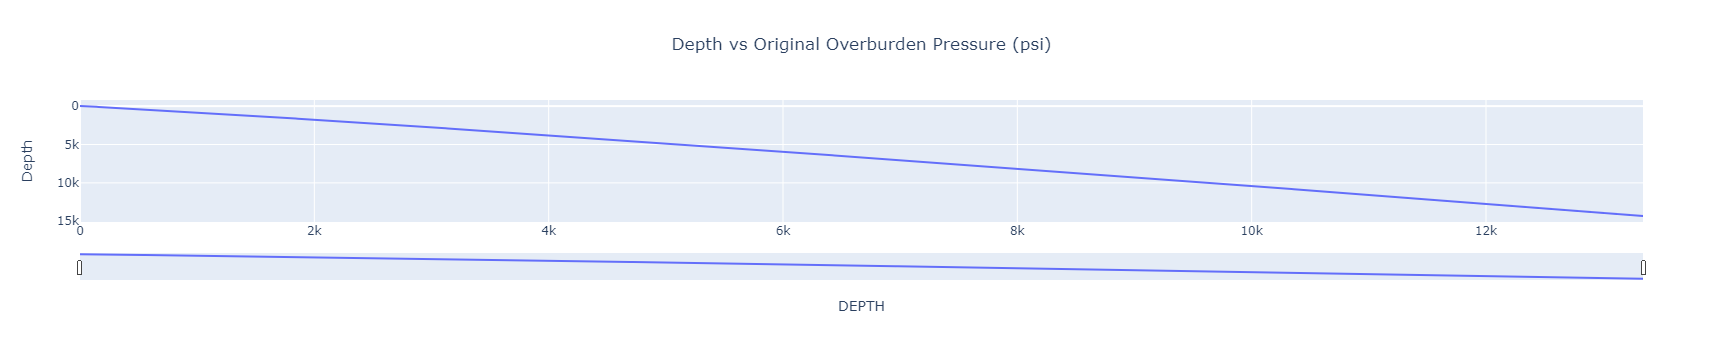

In [99]:
# Visulaize the OVBD PSI log we will write over
fig = go.Figure(data = go.Scatter(
    x = df1['DEPTH'],
    y = df1['OVBD_PSI']))

fig.update_layout(
    title = 'Depth vs Original Overburden Pressure (psi)',
    title_x = .5,
    xaxis_title = 'DEPTH',
    yaxis_title = 'OVBD_PSI')

# add a range slider
fig.update_xaxes(rangeslider_visible = True)

fig.update_yaxes(title_text = 'Depth', autorange = 'reversed')

fig.show()

# Log MD Shift by KB

In [100]:
# ***LOG MD SHIFT***

shift = 32

def main():
    if len(df1) == 0:
        print(f'Warning! The log is empty.')
        return

    else:
        df1['DEPTH'] = df1['DEPTH'] + shift
    
    
if __name__ == "__main__":
    try:
        main()
    except Exception as ex:
        print(ex)

# END LOG MD (KB) SHIFT
df1

,DEPTH,OVBD_PSI
0,32.0,0.0
1,52.0,0.0
2,72.0,7.0
3,92.0,24.0
4,112.0,41.0
...,...,...
662,13292.0,14209.0
663,13312.0,14233.0
664,13332.0,14256.0
665,13352.0,14279.0


In [101]:
# *** CREATE COPY OF OVBD_PPG_MD_SHIFTED TO MAKE LOW SIDE PORE PRESSURE LOG AND EDIT ***
# WILL CONVERT TO PPG LATER
df_LS = df1.copy()
df_LS.rename(columns={'OVBD_PSI': 'LS_PPG'}, inplace=True)

df_ML = df1.copy()
df_ML.rename(columns={'OVBD_PSI': 'ML_PPG'}, inplace=True)

df_HS = df1.copy()
df_HS.rename(columns={'OVBD_PSI': 'HS_PPG'}, inplace=True)

# END COPY KB SHIFTED OVBD LOG

# Load Topset

In [102]:
# bring in topset and remove last column
Topset1 = pd.read_csv(r'C:\Users\jac84753\OneDrive\Documents\Jacob\HESS\Pore Pressure\Topset1.txt', sep = "\t")
Topset1.drop('GeosteeringDip', axis = 1, inplace = True)

Topset1

,TopName,MD,X,Y,TVDSS,VS@0AZ
0,Greenhorn,4206.0,0.0,0.0,-1854.0,0.0
1,Bellle Fourche,4352.0,0.0,0.0,-2000.0,0.0
2,Mowry,4530.0,0.0,0.0,-2178.0,0.0
3,Inyan Kara,4889.0,0.0,0.0,-2537.0,0.0
4,Swift,5273.0,0.0,0.0,-2921.0,0.0
5,Rierdon,5709.0,0.0,0.0,-3357.0,0.0
6,Amsden,6748.0,0.0,0.0,-4396.0,0.0
7,Tyler,6788.0,0.0,0.0,-4436.0,0.0
8,Kibbey Lime,7351.0,0.0,0.0,-4999.0,0.0
9,Charles,7506.0,0.0,0.0,-5154.0,0.0


# Variable Bank

In [103]:
# Standard Variables
Water_Table_Elev = 100.0
Seabed_Elev = 200.0
Base_Zone_1 = 14000
Base_Zone_2 = 14000
Base_Zone_3 = 15000
Base_Zone_4 = 16000
Base_Zone_5 = 17000

# Variables for Low Side Pore Pressure
LS_Sea_Water_Density = 0.45
LS_Formation_water_Density_1 = 0.45
LS_Formation_water_Density_2 = 0.45
LS_Formation_water_Density_3 = 0.45
LS_Formation_water_Density_4 = 0.45
LS_Formation_water_Density_5 = 0.45

# Variables for Most Likely Pore Pressure
ML_Sea_Water_Density = 0.47
ML_Formation_water_Density_1 = 0.47
ML_Formation_water_Density_2 = 0.47
ML_Formation_water_Density_3 = 0.47
ML_Formation_water_Density_4 = 0.47
ML_Formation_water_Density_5 = 0.47

# Variables for High Side Pore Pressure
HS_Sea_Water_Density = 0.49
HS_Formation_water_Density_1 = 0.49
HS_Formation_water_Density_2 = 0.49
HS_Formation_water_Density_3 = 0.49
HS_Formation_water_Density_4 = 0.49
HS_Formation_water_Density_5 = 0.49

# Variables for Low Side known pressure anomoly zones
#inyan_kara_swift = ""
LS_20_high_amsden = 2974
LS_300_low_rival = 200
LS_upper_bakken = 4662

# Variables for Most Likely known pressure anomoly zones
ML_inyan_kara = 2300
ML_swift = 2420
ML_20_high_amsden = 3370
ML_300_low_rival = 370
ML_upper_bakken = 5562

# Variables for High Side known pressure anomoly zones
HS_inyan_kara = 2600
HS_swift = 2420
HS_20_high_amsden = 3500
HS_300_low_rival = 3993
HS_upper_bakken = 6462

inyan_kara = Topset1[Topset1['TopName'] == 'Inyan Kara']
swift = Topset1[Topset1['TopName'] == 'Swift']
amsden = Topset1[Topset1['TopName'] == 'Amsden']
frobisher_alida = Topset1[Topset1['TopName'] == 'Frobisher-Alida Interval']
upper_bakken = Topset1[Topset1['TopName'] == 'Upper Bakken']
three_forks = Topset1[Topset1['TopName'] == 'Three Forks']
birdbear = Topset1[Topset1['TopName'] == 'Birdbear']

# Lowside Log Calculations

In [104]:
for i in range(len(df_LS)):
        if df_LS['DEPTH'][i] <= Water_Table_Elev + shift:
            df_LS['LS_PPG'][i] = 0
            
        elif df_LS['DEPTH'][i] <= Seabed_Elev + shift:
            df_LS['LS_PPG'][i] = (df_LS['DEPTH'][i] - Water_Table_Elev - shift) * LS_Sea_Water_Density
            
        elif df_LS['DEPTH'][i] <= Base_Zone_1 + shift:
             df_LS['LS_PPG'][i] = (LS_Formation_water_Density_1) * (df_LS['DEPTH'][i] - df_LS['DEPTH'][i-1]) +  df_LS['LS_PPG'][i-1]
                
        elif df_LS['DEPTH'][i] <= Base_Zone_2 + shift:
             df_LS['LS_PPG'][i] = (LS_Formation_water_Density_2) * (df_LS['DEPTH'][i] - df_LS['DEPTH'][i-1]) +  df_LS['LS_PPG'][i-1]
                
        elif df_LS['DEPTH'][i] <= Base_Zone_3 + shift:
             df_LS['LS_PPG'][i] = (LS_Formation_water_Density_3) * (df_LS['DEPTH'][i] - df_LS['DEPTH'][i-1]) +  df_LS['LS_PPG'][i-1]
                
        elif df_LS['DEPTH'][i] <= Base_Zone_4 + shift:
             df_LS['LS_PPG'][i] = (LS_Formation_water_Density_4) * (df_LS['DEPTH'][i] - df_LS['DEPTH'][i-1]) +  df_LS['LS_PPG'][i-1]
                
        else:
             df_LS['LS_PPG'][i] = (LS_Formation_water_Density_5) * (df_LS['DEPTH'][i] - df_LS['DEPTH'][i-1]) +  df_LS['LS_PPG'][i-1]              

                
for i in range(len(df_LS)): 
    if df_LS['DEPTH'][i] in range(
             (int(amsden.MD) - 20),
             (int(amsden.MD) + 0)):
                 df_LS['LS_PPG'][i] = LS_20_high_amsden

    if round(df_LS['DEPTH'][i]) in range(
        (int(frobisher_alida.MD) + 0),
        (int(frobisher_alida.MD) + 130)):
            df_LS['LS_PPG'][i] = LS_300_low_rival

    if round(df_LS['DEPTH'][i]) in range(
        (int(upper_bakken.MD) + 0),
        (int(birdbear.MD) - 280)):
            df_LS['LS_PPG'][i] = LS_upper_bakken
                

# Most Likely Log Calculations

In [105]:
for i in range(len(df_ML)):
        if df_ML['DEPTH'][i] <= Water_Table_Elev + shift:
            df_ML['ML_PPG'][i] = 0
            
        elif df_ML['DEPTH'][i] <= Seabed_Elev + shift:
            df_ML['ML_PPG'][i] = (df_ML['DEPTH'][i] - Water_Table_Elev - shift) * ML_Sea_Water_Density
            
        elif df_ML['DEPTH'][i] <= Base_Zone_1 + shift:
             df_ML['ML_PPG'][i] = (ML_Formation_water_Density_1) * (df_ML['DEPTH'][i] - df_ML['DEPTH'][i-1]) +  df_ML['ML_PPG'][i-1]
                
        elif df_ML['DEPTH'][i] <= Base_Zone_2 + shift:
             df_ML['ML_PPG'][i] = (ML_Formation_water_Density_2) * (df_ML['DEPTH'][i] - df_ML['DEPTH'][i-1]) +  df_ML['ML_PPG'][i-1]
                
        elif df_ML['DEPTH'][i] <= Base_Zone_3 + shift:
             df_ML['ML_PPG'][i] = (ML_Formation_water_Density_3) * (df_ML['DEPTH'][i] - df_ML['DEPTH'][i-1]) +  df_ML['ML_PPG'][i-1]
                
        elif df_ML['DEPTH'][i] <= Base_Zone_4 + shift:
             df_ML['ML_PPG'][i] = (ML_Formation_water_Density_4) * (df_ML['DEPTH'][i] - df_ML['DEPTH'][i-1]) +  df_ML['ML_PPG'][i-1]
                
        else:
             df_ML['ML_PPG'][i] = (ML_Formation_water_Density_5) * (df_ML['DEPTH'][i] - df_ML['DEPTH'][i-1]) +  df_ML['ML_PPG'][i-1]
                

for i in range(len(df_ML)): 
        if df_ML['DEPTH'][i] in range(
             (int(inyan_kara.MD)),
             (int(swift.MD))):
                df_ML['ML_PPG'][i] = ML_inyan_kara
                
        if df_ML['DEPTH'][i] in range(
             (int(amsden.MD) - 20),
             (int(amsden.MD) + 0)):
                df_ML['ML_PPG'][i] = ML_20_high_amsden 
                
        if df_ML['DEPTH'][i] in range(
             (int(frobisher_alida.MD)),
             (int(frobisher_alida.MD + 130))):
                df_ML['ML_PPG'][i] = ML_300_low_rival
                
        if df_ML['DEPTH'][i] in range(
             (int(upper_bakken.MD)),
             (int(birdbear.MD - 280))):
                df_ML['ML_PPG'][i] = ML_upper_bakken      
                
               

# High Side Log Calculations

In [106]:

for i in range(len(df_HS)):
        if df_HS['DEPTH'][i] <= Water_Table_Elev + shift:
            df_HS['HS_PPG'][i] = 0
            
        elif df_HS['DEPTH'][i] <= Seabed_Elev + shift:
            df_HS['HS_PPG'][i] = (df_HS['DEPTH'][i] - Water_Table_Elev - shift) * HS_Sea_Water_Density
            
        elif df_HS['DEPTH'][i] <= Base_Zone_1 + shift:
             df_HS['HS_PPG'][i] = (HS_Formation_water_Density_1) * (df_HS['DEPTH'][i] - df_HS['DEPTH'][i-1]) +  df_HS['HS_PPG'][i-1]
                
        elif df_HS['DEPTH'][i] <= Base_Zone_2 + shift:
             df_HS['HS_PPG'][i] = (HS_Formation_water_Density_2) * (df_HS['DEPTH'][i] - df_HS['DEPTH'][i-1]) +  df_HS['HS_PPG'][i-1]
                
        elif df_HS['DEPTH'][i] <= Base_Zone_3 + shift:
             df_HS['HS_PPG'][i] = (HS_Formation_water_Density_3) * (df_HS['DEPTH'][i] - df_HS['DEPTH'][i-1]) +  df_HS['HS_PPG'][i-1]
                
        elif df_HS['DEPTH'][i] <= Base_Zone_4 + shift:
             df_HS['HS_PPG'][i] = (HS_Formation_water_Density_4) * (df_HS['DEPTH'][i] - df_HS['DEPTH'][i-1]) +  df_HS['HS_PPG'][i-1]
                
        else:
             df_HS['HS_PPG'][i] = (HS_Formation_water_Density_5) * (df_HS['DEPTH'][i] - df_HS['DEPTH'][i-1]) +  df_HS['HS_PPG'][i-1]
                
                
                
                
for i in range(len(df_HS)): 
        if df_HS['DEPTH'][i] in range(
             (int(inyan_kara.MD)),
             (int(swift.MD))):
                df_HS['HS_PPG'][i] = HS_inyan_kara
                
        if df_HS['DEPTH'][i] in range(
             (int(amsden.MD) - 20),
             (int(amsden.MD) + 0)):
                df_HS['HS_PPG'][i] = HS_20_high_amsden 
                
        if df_HS['DEPTH'][i] in range(
             (int(frobisher_alida.MD)),
             (int(frobisher_alida.MD + 130))):
                df_HS['HS_PPG'][i] = HS_300_low_rival
                
        if df_HS['DEPTH'][i] in range(
             (int(upper_bakken.MD)),
             (int(birdbear.MD - 280))):
                df_HS['HS_PPG'][i] = HS_upper_bakken                   
                
                
for i in range(len(df_LS)):
    if df_LS['DEPTH'][i] > 0:
        df_LS['LS_PPG'][i] = df_LS['LS_PPG'][i] / df_LS['DEPTH'][i] / 0.052
        
for i in range(len(df_ML)):
    if df_ML['DEPTH'][i] > 0:
        df_ML['ML_PPG'][i] = df_ML['ML_PPG'][i] / df_ML['DEPTH'][i] / 0.052   
        
for i in range(len(df_HS)):
    if df_HS['DEPTH'][i] > 0:
        df_HS['HS_PPG'][i] = df_HS['HS_PPG'][i] / df_HS['DEPTH'][i] / 0.052           



# Figure Code

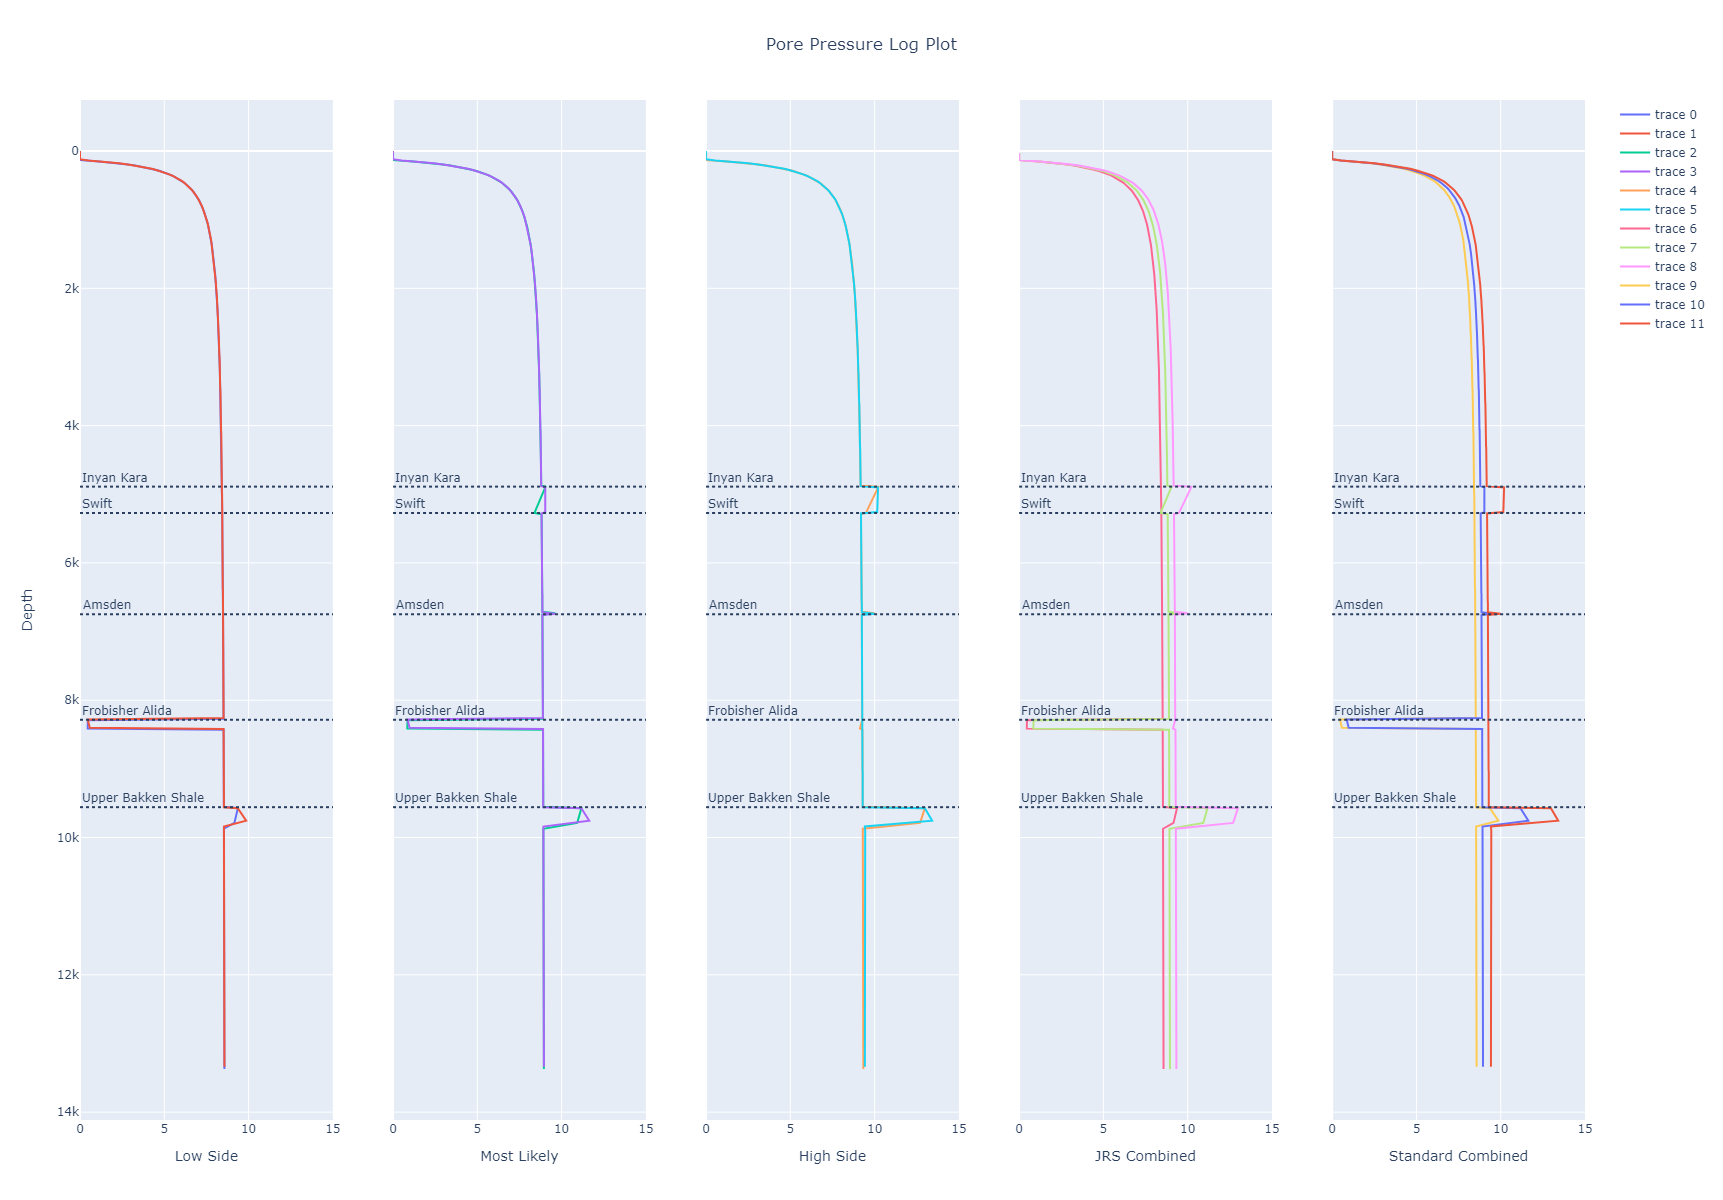

In [107]:
fig = make_subplots(rows = 1, cols = 5, shared_yaxes = True)

# Low side
fig.add_trace(go.Scatter(x = df_LS['LS_PPG'], y = df_LS['DEPTH']), row = 1, col = 1)
fig.add_trace(go.Scatter(x = df_OG_LS['OG OF LS_PP_PPG'], y = df_OG_LS['DEPTH']), row = 1, col = 1)

# Most likely
fig.add_trace(go.Scatter(x = df_ML['ML_PPG'], y = df_ML['DEPTH']), row = 1, col = 2)
fig.add_trace(go.Scatter(x = df_OG_ML['OG OF ML_PP_PPG'], y = df_OG_ML['DEPTH']), row = 1, col = 2)

# High side
fig.add_trace(go.Scatter(x = df_HS['HS_PPG'], y = df_HS['DEPTH']), row = 1, col = 3)
fig.add_trace(go.Scatter(x = df_OG_HS['OG OF HS_PP_PPG'], y = df_OG_HS['DEPTH']), row = 1, col = 3)

# JRS combined
fig.add_trace(go.Scatter(x = df_LS['LS_PPG'], y = df_LS['DEPTH']), row = 1, col = 4)
fig.add_trace(go.Scatter(x = df_ML['ML_PPG'], y = df_ML['DEPTH']), row = 1, col = 4)
fig.add_trace(go.Scatter(x = df_HS['HS_PPG'], y = df_HS['DEPTH']), row = 1, col = 4)




# Standard combined
fig.add_trace(go.Scatter(x = df_OG_LS['OG OF LS_PP_PPG'], y = df_OG_LS['DEPTH']), row = 1, col = 5)
fig.add_trace(go.Scatter(x = df_OG_ML['OG OF ML_PP_PPG'], y = df_OG_ML['DEPTH']), row = 1, col = 5)
fig.add_trace(go.Scatter(x = df_OG_HS['OG OF HS_PP_PPG'], y = df_OG_HS['DEPTH']), row = 1, col = 5)



# Add formation tops and labels
fig.add_hline(y = int(inyan_kara['MD']), line_dash = 'dot', row=1, col="all", annotation_text = 'Inyan Kara', annotation_position = 'top left')
fig.add_hline(y = int(swift['MD']), line_dash="dot", row=1, col="all", annotation_text = 'Swift', annotation_position = 'top left')
fig.add_hline(y =int(amsden['MD']), line_dash="dot", row=1, col="all", annotation_text = 'Amsden', annotation_position = 'top left')
fig.add_hline( y=int(frobisher_alida['MD']), line_dash="dot", row=1, col="all", annotation_text = 'Frobisher Alida', annotation_position = 'top left')
fig.add_hline(y = int(upper_bakken['MD']), line_dash="dot", row=1, col="all", annotation_text = 'Upper Bakken Shale', annotation_position = 'top left')




fig.update_yaxes(title_text = 'Depth', row = 1, col = 1, autorange = 'reversed')

fig.update_layout(title_text = 'Pore Pressure Log Plot', title_x = .5,  height = 1200)

fig.update_xaxes(title_text = 'Low Side', row = 1, col = 1)
fig.update_xaxes(title_text = 'Most Likely', row = 1, col = 2)
fig.update_xaxes(title_text = 'High Side', row = 1, col = 3)
fig.update_xaxes(title_text = 'JRS Combined', row = 1, col = 4)
fig.update_xaxes(title_text = 'Standard Combined', row = 1, col = 5)
fig.update_xaxes(range = [0,15])

# add a range slider
fig.update_xaxes(rangeslider_visible = False)

fig.show()

## Test for linear regression

## Test for Lee's spreadsheet data for the Bakken Overpressured Zone and convert PSI to PPG

         PPG  Depth
0   9.364304   9574
1   9.420952   9594
2   9.443145   9602
3   9.497466   9622
4   9.553556   9642
5   9.603440   9660
6   9.657104   9680
7   9.693752   9693
8   9.749028   9713
9   9.802101   9733
10  9.856928   9753
11  9.862792   9755
          PPG  Depth
0   11.172085   9574
1   11.224964   9594
2   11.245654   9602
3   11.296228   9622
4   11.348587   9642
5   11.395127   9660
6   11.445089   9680
7   11.479339   9693
8   11.530938   9713
9   11.580349   9733
10  11.631530   9753
11  11.637030   9755
          PPG  Depth
0   12.979865   9574
1   13.028976   9594
2   13.048163   9602
3   13.094991   9622
4   13.143618   9642
5   13.186813   9660
6   13.233074   9680
7   13.264926   9693
8   13.312848   9713
9   13.358598   9733
10  13.406131   9753
11  13.411268   9755


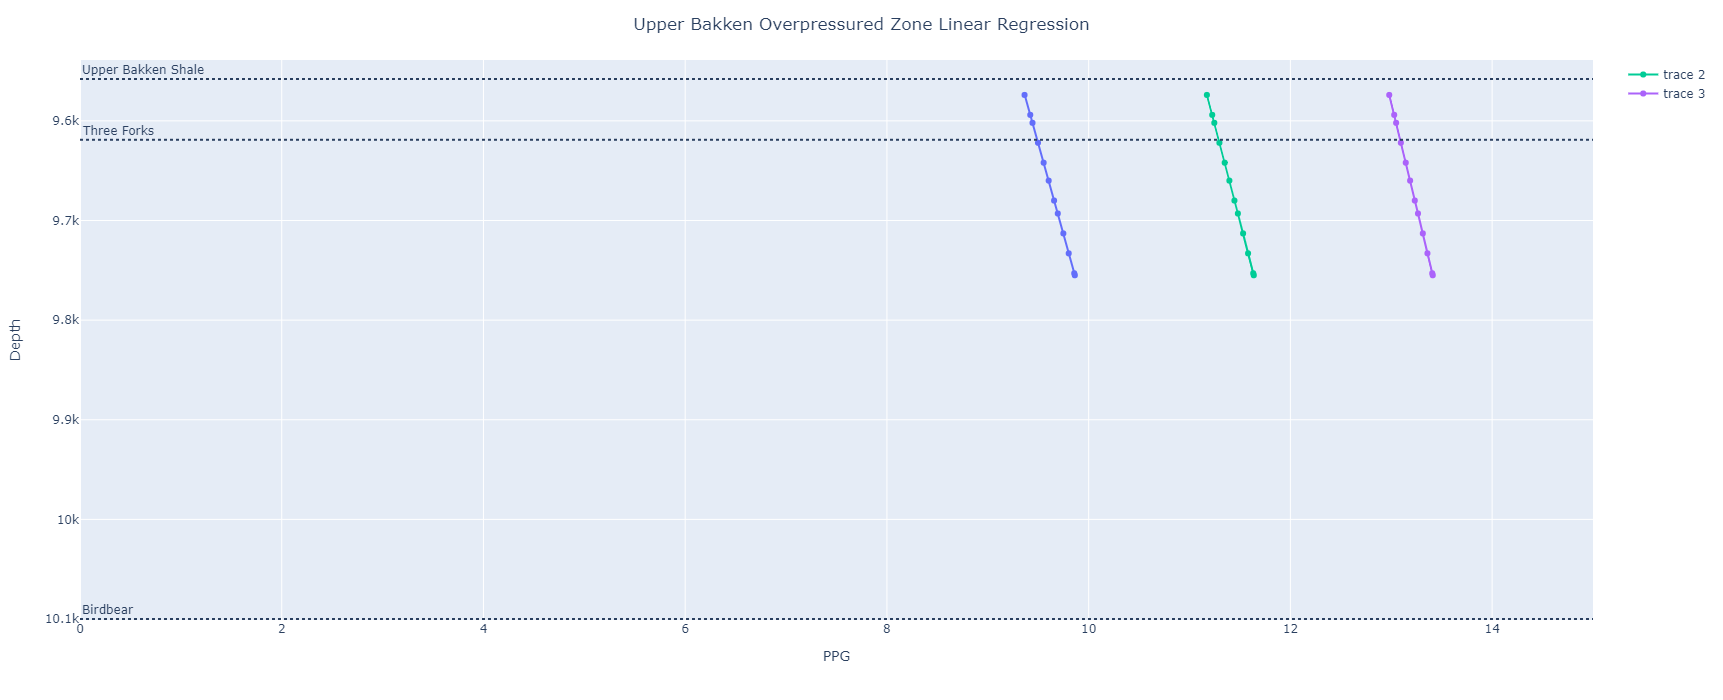

                                      px_fit_results
0  <statsmodels.regression.linear_model.Regressio...


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=12



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.888e+05
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           2.77e-24
Time:                        12:19:44   Log-Likelihood:                -2.7693
No. Observations:                  12   AIC:                             9.539
Df Residuals:                      10   BIC:                             10.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6166.3028      5.618   1097.656      0.000    6153.786    6178.820
x1           363.8416      0.584    623.499      0.000     362.541     365.142
==============================================================================
Omnibus:                        0.605   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.739   Jarque-Bera (JB):                0.579
Skew:                           0.187   Prob(JB):                        0.749
Kurtosis:                       1.991   Cond. No.                         567.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
#### Low Side

# define known pressure variables to depths
a = {
    'PSI' : [4662, 4700, 4715, 4752, 4790, 4824, 4861, 4886, 4924, 4961, 4999, 5003], 
    'Depth' : [9574, 9594, 9602, 9622, 9642, 9660, 9680, 9693, 9713, 9733, 9753, 9755]
}

# create a dataframe from these values
df_mb_ls_lr = pd.DataFrame(a)


# convert from PSI to PPG
for i in range(len(df_mb_ls_lr)):
    if df_mb_ls_lr['Depth'][i] > 0:
        df_mb_ls_lr['PSI'][i] = df_mb_ls_lr['PSI'][i] / df_mb_ls_lr['Depth'][i] / 0.052

# rename column from PSI to PPG        
df_mb_ls_lr.rename(columns={"PSI": "PPG"}, inplace = True)    
print(df_mb_ls_lr)    






#### Most Likely 

# define known pressure variables to depths
b = {
    'PSI' : [5562, 5600, 5615, 5652, 5690, 5724, 5761, 5786, 5824, 5861, 5899, 5903], 
    'Depth' : [9574, 9594, 9602, 9622, 9642, 9660, 9680, 9693, 9713, 9733, 9753, 9755]
}

# create a dataframe from these values
df_mb_ml_lr = pd.DataFrame(b)


# convert from PSI to PPG
for i in range(len(df_mb_ml_lr)):
    if df_mb_ml_lr['Depth'][i] > 0:
        df_mb_ml_lr['PSI'][i] = df_mb_ml_lr['PSI'][i] / df_mb_ml_lr['Depth'][i] / 0.052

# rename column from PSI to PPG        
df_mb_ml_lr.rename(columns={"PSI": "PPG"}, inplace = True)    
print(df_mb_ml_lr)    






#### High Side                 
                 
                 
c = {
    'PSI' : [6462, 6500, 6515, 6552, 6590, 6624, 6661, 6686, 6724, 6761, 6799, 6803], 
    'Depth' : [9574, 9594, 9602, 9622, 9642, 9660, 9680, 9693, 9713, 9733, 9753, 9755]
}

# create a dataframe from these values
df_mb_hs_lr = pd.DataFrame(c)


# convert from PSI to PPG
for i in range(len(df_mb_hs_lr)):
    if df_mb_hs_lr['Depth'][i] > 0:
        df_mb_hs_lr['PSI'][i] = df_mb_hs_lr['PSI'][i] / df_mb_hs_lr['Depth'][i] / 0.052

# rename column from PSI to PPG        
df_mb_hs_lr.rename(columns={"PSI": "PPG"}, inplace = True)    
print(df_mb_hs_lr)    


fig = px.scatter(df_mb_ls_lr, 
                 x = "PPG", 
                 y = "Depth", 
                 trendline = 'ols')
# fig.add_trace(go.Scatter(x = df_mb_ls_lr['PPG'], y = df_mb_ls_lr['Depth']), row = 1, col = 1)
fig.add_trace(go.Scatter(x = df_mb_ml_lr['PPG'], y = df_mb_ml_lr['Depth']), row = 1, col = 1)
fig.add_trace(go.Scatter(x = df_mb_hs_lr['PPG'], y = df_mb_hs_lr['Depth']), row = 1, col = 1)


fig.update_layout(title_text = 'Upper Bakken Overpressured Zone Linear Regression', title_x = .5,  height = 700)

fig.update_yaxes(title_text = 'Depth', row = 1, col = 1, autorange = 'reversed')
fig.update_xaxes(range = [0,15])

fig.add_hline(y = int(upper_bakken['MD']), line_dash="dot", row=1, col="all", annotation_text = 'Upper Bakken Shale', annotation_position = 'top left')
fig.add_hline(y = int(three_forks['MD']), line_dash="dot", row=1, col="all", annotation_text = 'Three Forks', annotation_position = 'top left')
fig.add_hline(y = int(birdbear['MD']), line_dash="dot", row=1, col="all", annotation_text = 'Birdbear', annotation_position = 'top left')

fig.show()

results = px.get_trendline_results(fig)
print(results)

results.px_fit_results.iloc[0].summary()    